<a href="https://colab.research.google.com/github/Sujangyawali/bigmart-sale-price-prediction/blob/main/bigmart_data_saleprice_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.7 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=950d2bdbbeb9ebc243d3d012f0d5543d1b603b61228fb87afcb02263b19e3da5
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-08-09 11:16:59          10436        869  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6380        479  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2390        179  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

In [ ]:
! kaggle datasets download -d brijbhushannanda1979/bigmart-sales-data

  0% 0.00/307k [00:00<?, ?B/s]
100% 307k/307k [00:00<00:00, 88.3MB/s]


In [ ]:
! unzip /content/bigmart-sales-data.zip

Archive:  /content/bigmart-sales-data.zip
  inflating: Test.csv                
  inflating: Train.csv               


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import expon,norm,boxcox
from sklearn.preprocessing import PowerTransformer
from scipy.stats.stats import pearsonr

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train=pd.read_csv('/content/Train.csv')


In [ ]:
test=pd.read_csv('/content/Test.csv')

Exploratory Data Analysis(EDA)

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train.shape

(8523, 12)

In [ ]:
test.shape

(5681, 11)

In [ ]:
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Missing Vlaue Calculation

In [ ]:
def missing(df):
  number=df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False)!=0]
  percent=number/len(df)*100
  missing_df=pd.concat((number,percent),keys=['Number','Percent'], axis=1)
  return missing_df

In [ ]:
missing(train)

,Number,Percent
Outlet_Size,2410,28.276428
Item_Weight,1463,17.165317


In [ ]:
missing(test)

,Number,Percent
Outlet_Size,1606,28.269671
Item_Weight,976,17.180074


In [ ]:
saleprice=train.Item_Outlet_Sales
saleprice

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of SalePrice')

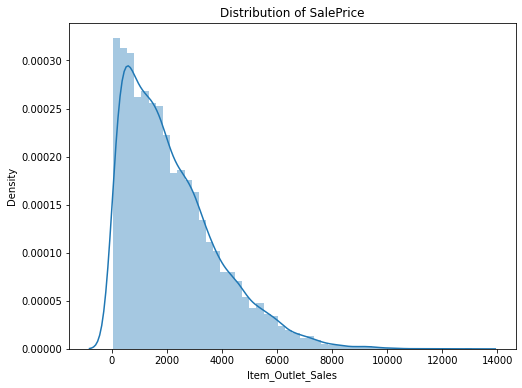

In [ ]:
f,ax=plt.subplots(figsize=(8,6))
sns.distplot(saleprice)
ax.set_title('Distribution of SalePrice')

Data is right skewd we need to transform it to normal form as possible.


In [ ]:
saleprice.isnull().any()

False

There is no negative value ,good for us.We can use boxcox transform to normalize data.


In [ ]:
norm_sale_price,fitted_lambda=boxcox(saleprice)#fitted_lambda is estimated by maximum likelyhood method

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


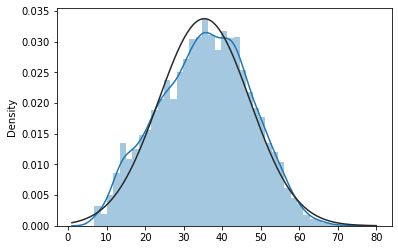

In [ ]:
sns.distplot(norm_sale_price,fit=norm)

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


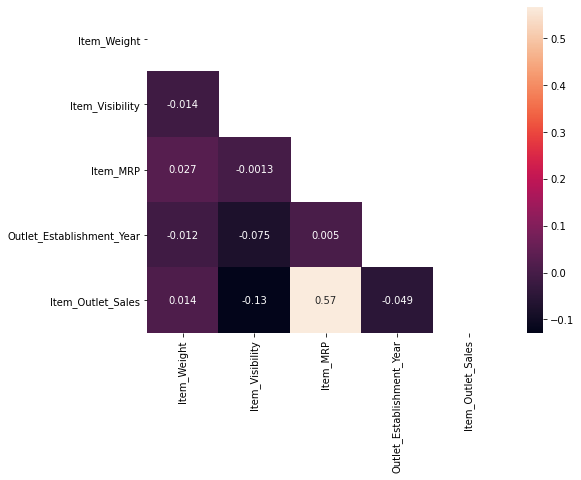

In [ ]:
f,ax=plt.subplots(figsize=(8,6))
mask=np.zeros_like(train.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train.corr(),annot=True,mask=mask)

From the heatmap above there is no high correlation between dependent variable (Sale price and ) except Item_MRP feature 

In [ ]:
#Let's check significance of correlation between Item_Outlet_Sales and Item_MRP
r,p_value=pearsonr((train['Item_MRP'].to_numpy()),(train['Item_Outlet_Sales'].to_numpy()))

In [ ]:
p_value

0.0

Which is statistically significant

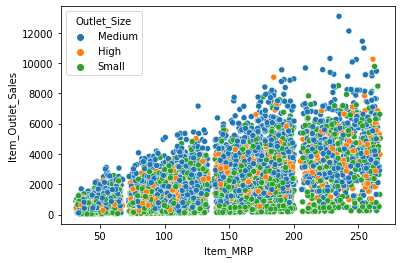

In [ ]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=train,hue='Outlet_Size')

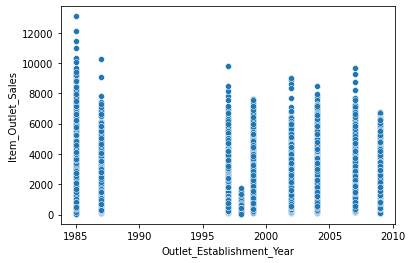

In [ ]:
sns.scatterplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=train)

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


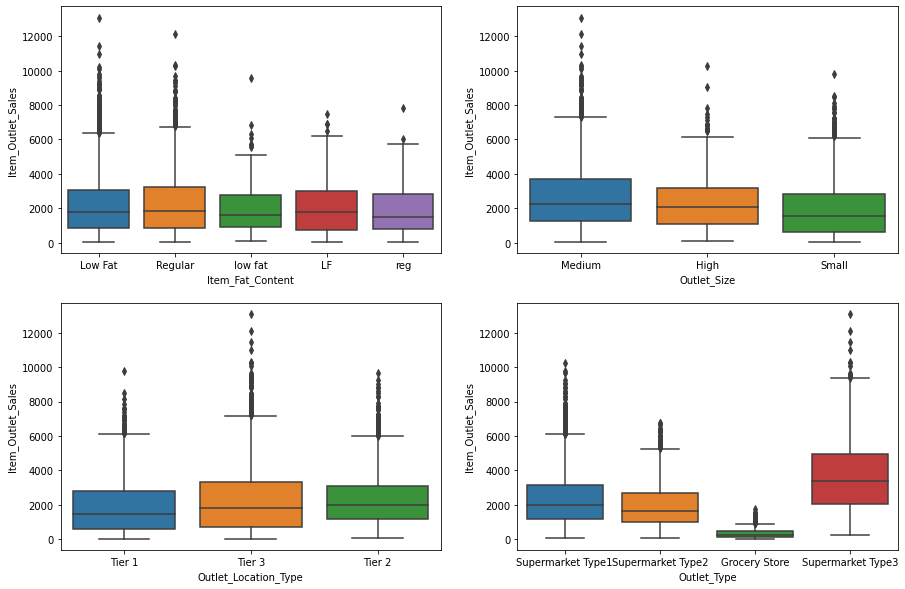

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,10))

sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train,ax=ax[0,0])
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train,ax=ax[0,1])
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train,ax=ax[1,0])
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train,ax=ax[1,1])

Since Low Fat,low fat and LF represent the meanding converting them to single value Low Fat likewise reg is changed into Regular

From above plot no one give significane information about relation with saleprice but Outlet type Supermarket Type 3 has high median value for sale price this will be explore more later.

In [ ]:
train['Item_Fat_Content']=train['Item_Fat_Content'].apply( lambda x: 'Low Fat' if x in ['Low Fat','low fat','low fat'] else 'Regular')

In [ ]:
test['Item_Fat_Content']=test['Item_Fat_Content'].apply( lambda x: 'Low Fat' if x in ['Low Fat','low fat','low fat'] else 'Regular')

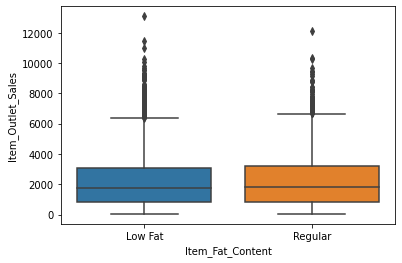

In [ ]:
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train)

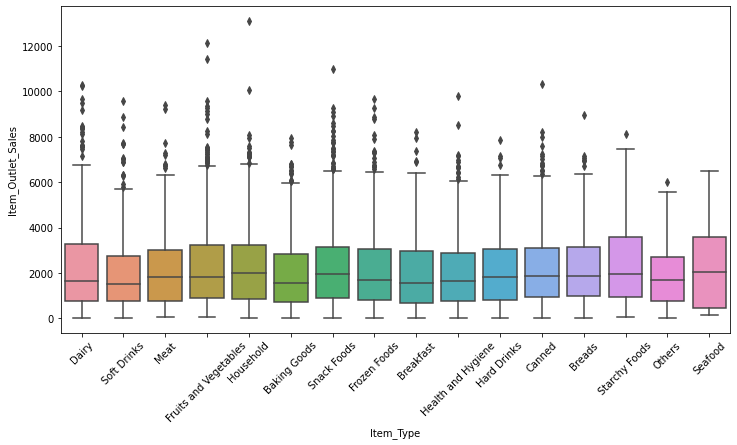

In [ ]:
f, ax=plt.subplots(figsize=(12,6))

ax=sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=train)
ax= plt.setp(ax.get_xticklabels(), rotation=45)

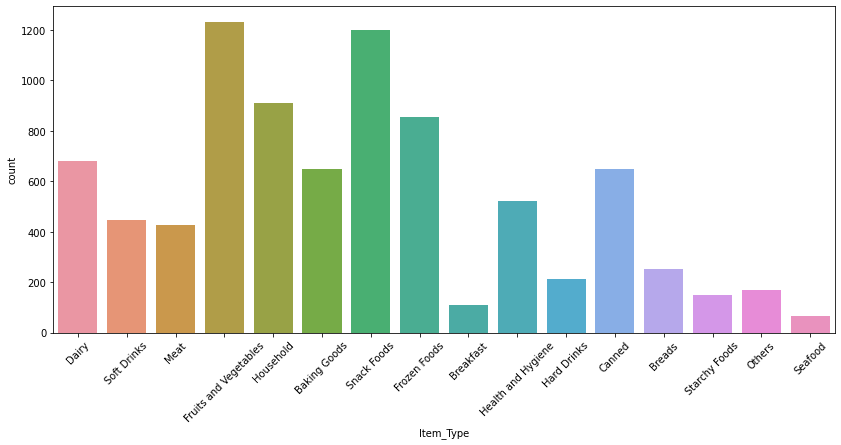

In [ ]:
f,ax=plt.subplots(figsize=(14,6))

ax=sns.countplot(x='Item_Type',data=train)
ax= plt.setp(ax.get_xticklabels(), rotation=45)




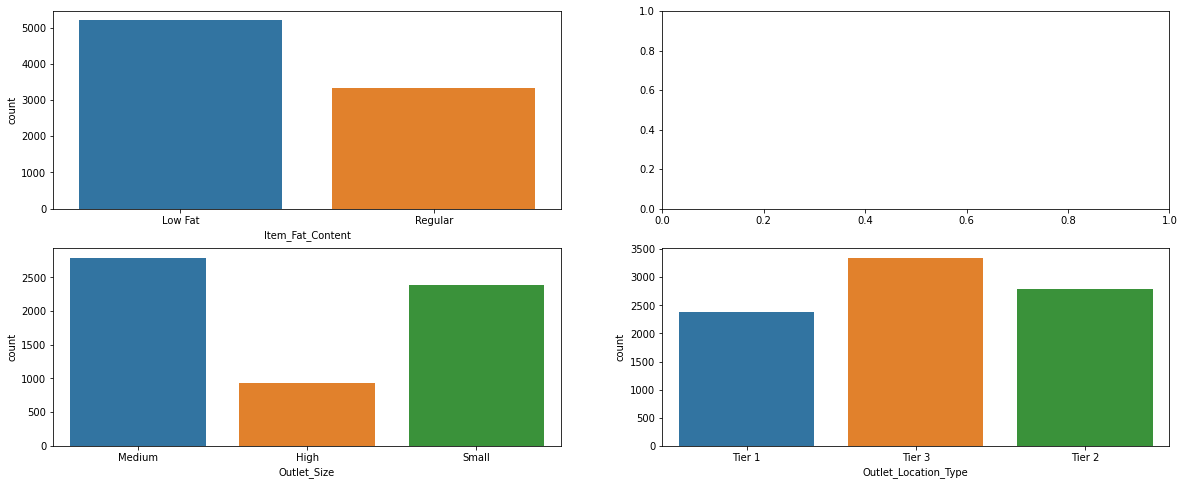

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,8))
sns.countplot(x='Item_Fat_Content',data=train,ax=ax[0,0])
#sns.countplot(x='Item_Type',data=train,ax=ax[0,1])
sns.countplot(x='Outlet_Size',data=train,ax=ax[1,0])
sns.countplot(x='Outlet_Location_Type',data=train,ax=ax[1,1])

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Text(0.5, 1.0, 'Number of Outlet Type Based on Location Type')

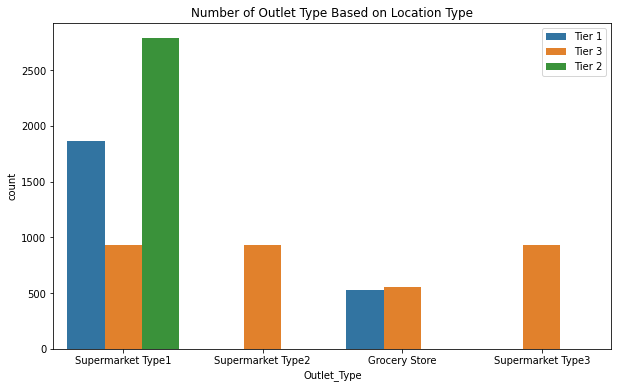

In [ ]:
f,ax=plt.subplots(figsize=(10,6))
sns.countplot(x='Outlet_Type',hue='Outlet_Location_Type',data=train)
plt.legend(loc='upper right')
ax.set_title('Number of Outlet Type Based on Location Type')

There is only Supermarket Type 2 & 3 in Tier 3 location

In [ ]:
missing(train)

,Number,Percent
Outlet_Size,2410,28.276428
Item_Weight,1463,17.165317


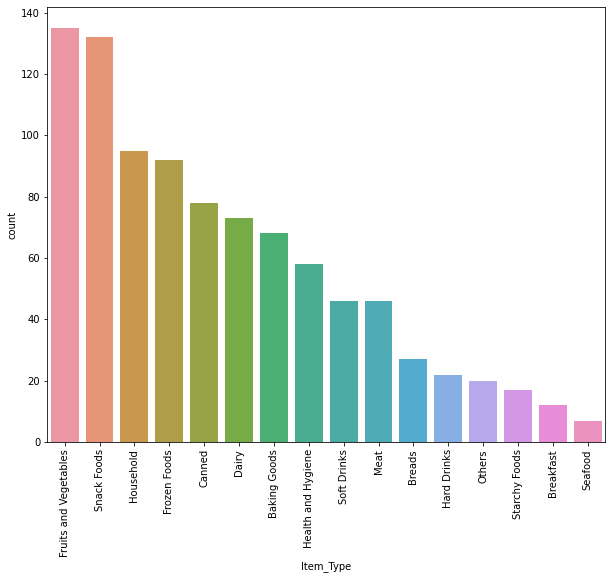

In [ ]:

f,ax=plt.subplots(figsize=(10,8))
ax=sns.countplot(x='Item_Type',data=train[train.Outlet_Type=='Supermarket Type2'],
                 order=train[train.Outlet_Type=='Supermarket Type2']['Item_Type'].value_counts().index)
ax=plt.setp(ax.get_xticklabels(),rotation=90)


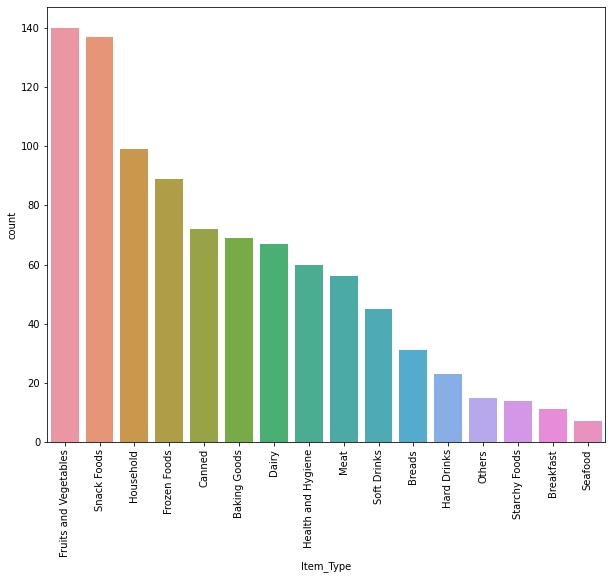

In [ ]:

f,ax=plt.subplots(figsize=(10,8))
ax=sns.countplot(x='Item_Type',data=train[train.Outlet_Type=='Supermarket Type3'],
                 order=train[train.Outlet_Type=='Supermarket Type3']['Item_Type'].value_counts().index)
ax=plt.setp(ax.get_xticklabels(),rotation=90)

In [ ]:
missing(train)

,Number,Percent
Outlet_Size,2410,28.276428
Item_Weight,1463,17.165317


In [ ]:
missing(test)

,Number,Percent
Outlet_Size,1606,28.269671
Item_Weight,976,17.180074


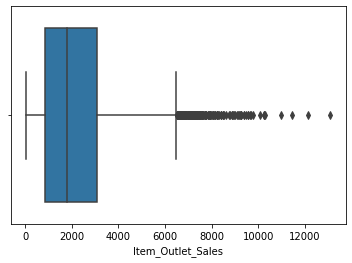

In [ ]:
sns.boxplot(x='Item_Outlet_Sales',data=train)

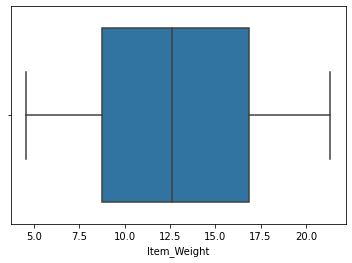

In [ ]:
sns.boxplot(x='Item_Weight',data=train)

In [ ]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].median())

In [ ]:
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].median())

In [ ]:
missing(train)

,Number,Percent
Outlet_Size,2410,28.276428


In [ ]:
missing(test)

,Number,Percent


In [ ]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [ ]:
train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']=test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [ ]:
missing(train)

,Number,Percent


In [ ]:
missing(test)

,Number,Percent


In [ ]:
overall_bimart_data=pd.concat([train,test],axis=0)

In [ ]:
overall_bimart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
overall_bimart_data.to_excel('/content/bigmart_sell.xls')

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
Item_Outlet_Sales=train['Item_Outlet_Sales']

In [ ]:
train.drop(columns='Item_Outlet_Sales',inplace=True)

In [ ]:
train.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)
test.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)

KeyError: ignored

In [ ]:
pd.get_dummies(train)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,2002,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,2009,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


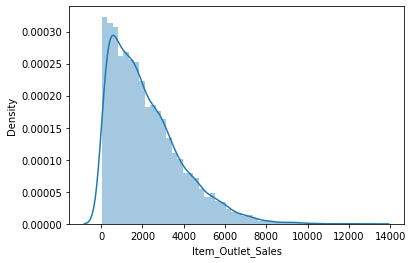

In [ ]:
sns.distplot(Item_Outlet_Sales)

In [ ]:
from scipy.stats import boxcox,norm

In [ ]:
transformed_sale_value,calculated_lambda_value=boxcox(Item_Outlet_Sales)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


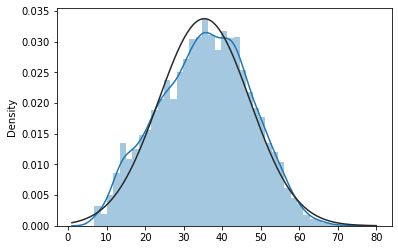

In [ ]:
sns.distplot(transformed_sale_value,fit=norm)

#use standardization for sacaling further because looks like gaussian distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


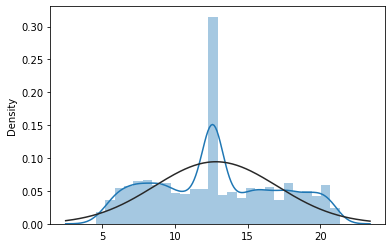

In [ ]:
sns.distplot(x=train['Item_Weight'],fit=norm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


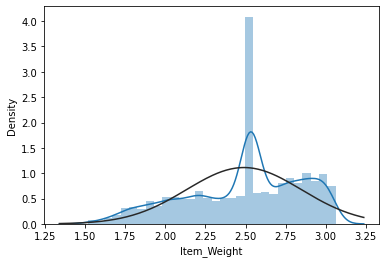

In [ ]:
i,j=boxcox(train['Item_Weight'])
sns.distplot(np.log(train['Item_Weight']),fit=norm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


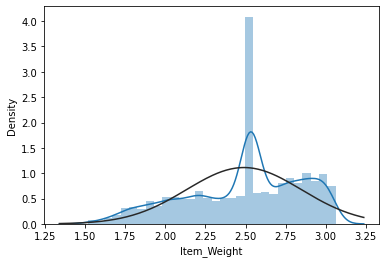

In [ ]:
sns.distplot(np.log(train['Item_Weight']),fit=norm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


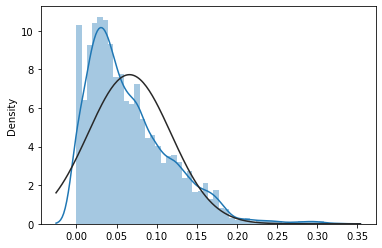

In [ ]:
sns.distplot(x=train['Item_Visibility'],fit=norm)#no scaling 

In [ ]:
any(train['Item_Visibility']==0)

True

In [ ]:
any(test['Item_Visibility']==0)

True

In [ ]:
print(any(train['Item_Visibility']<0))
print(any(test['Item_Visibility']<0))

False
False


There are zero values but no negative value.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


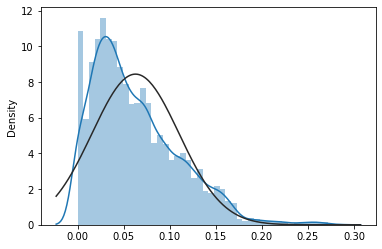

In [ ]:
sns.distplot(x=np.log(train['Item_Visibility']+1),fit=norm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


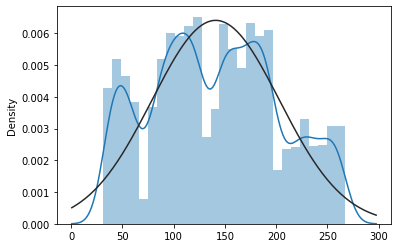

In [ ]:
sns.distplot(x=train['Item_MRP'],fit=norm)

#scale with normalization because it doesnot has normal diatribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


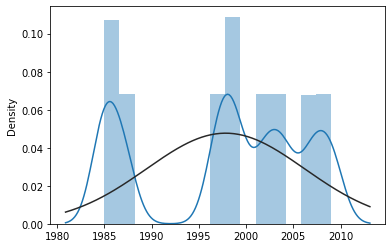

In [ ]:
sns.distplot(x=train['Outlet_Establishment_Year'],fit=norm)

Let's apply Robustscaler for this(Outlet_Establishment_Year) Feature





In [ ]:
train.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2


In [ ]:
final_train=pd.get_dummies(train)
final_test=pd.get_dummies(test)

In [ ]:
final_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [ ]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso,Ridge,RidgeCV
from sklearn.preprocessing import normalize,StandardScaler




In [ ]:
X=final_train.values
y=transformed_sale_value

In [ ]:
final_test.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.75,0.007565,107.8622,1999,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
1,8.30,0.038428,87.3198,2007,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
y_test=final_test.values

In [ ]:
final_train.head(2)
#before scaling

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
sc = StandardScaler()


X_train_scaled = sc.fit_transform(final_train)
pd.DataFrame(X_train_scaled,columns=list(final_train.columns)).head()

#after scaling

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.831187,-0.970732,1.747454,0.139541,0.799202,-0.799202,-0.286855,-0.174193,-0.114346,-0.287094,3.390733,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.350395,0.798807,-0.623893,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028
1,-1.630810,-0.908111,-1.489023,1.334103,-1.251249,1.251249,-0.286855,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,4.260611,-0.132935,-0.350395,0.798807,-0.623893,-0.623893,-0.696678,1.242650,-0.381529,-1.375891,2.860816,-0.351028
2,1.108727,-0.956917,0.010040,0.139541,0.799202,-0.799202,-0.286855,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,4.365102,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.350395,0.798807,-0.623893,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028
3,1.510904,-1.281758,0.660050,0.020085,-1.251249,1.251249,-0.286855,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,2.432698,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.350395,0.798807,-0.623893,-0.623893,-0.696678,1.242650,2.621031,-1.375891,-0.349551,-0.351028
4,-0.918719,-1.281758,-1.399220,-1.293934,0.799202,-0.799202,-0.286855,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,2.892392,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,2.853918,-1.251866,-0.623893,-0.623893,-0.696678,1.242650,-0.381529,0.726802,-0.349551,-0.351028


In [ ]:
y_train_scaled=sc.fit_transform((y).reshape(-1, 1))

In [ ]:
def evaluate(model):
  cv=KFold(n_splits=5,shuffle=True)
  score=-(cross_val_score(model,X_train_scaled,y_train_scaled,scoring='neg_mean_squared_error',cv=cv,n_jobs=-1)).mean()
  print(score)
 



In [ ]:
#l2 regularization
ri=Ridge()
evaluate(ri)

0.32031783491595933
0.32031783491595933 0.0


In [ ]:
#l1 regularization perfom feature selection
ls=Lasso()
evaluate(ls)

1.000093522885266
1.000093522885266 0.0


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
evaluate(dt)

0.6226571159590859
0.6226571159590859 0.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
evaluate(rf)

0.3429731060803175
0.3429731060803175 0.0


In [ ]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
evaluate(xgb)

0.30354581034974876
0.30354581034974876 0.0


In [ ]:
from lightgbm import LGBMRegressor
lgb=LGBMRegressor()
evaluate(lgb)

0.31462162644227354
0.31462162644227354 0.0


In [ ]:
from mlxtend.regressor import StackingRegressor

stack_gen =StackingRegressor(regressors=[ri, ls, dt, rf, xgb, lgb],meta_regressor=xgb,use_features_in_secondary=True)
                              
evaluate(stack_gen)

0.6163483218993484
0.6163483218993484 0.0


Base line model lgb,xgb,rf,ri perfoem in same range so let's dive deep thins model to perform hype-rparameter tuning to perform better.

In [ ]:
from sklearn.svm import SVR
svr=SVR()

evaluate(svr)

0.3222512518052728
0.3222512518052728 0.0


Our baseline model gives rmse of 0.5511 .Let's Perform Hyper-parameter tunning to in irease accuracy.

1.GridSearch

In [ ]:
import warnings

warnings.filterwarnings('ignore')


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV,KFold

cv=KFold(n_splits=5,shuffle=True,random_state=42)

param={
     'learning_rate':np.logspace(-3,-1,3),
     'estimators':np.linspace(500,700,3),
     'max_depth':np.linspace(5,8,4,dtype=int)
 }

xgb_gs=GridSearchCV(xgb,param_grid=param,scoring='neg_mean_squared_error',cv=cv)

xgb_gs.fit(X_train_scaled,y_train_scaled)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f34b2f44510>,
      dtype=object)

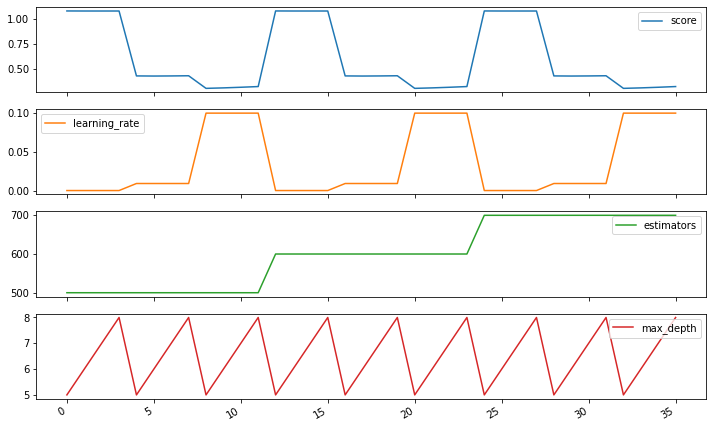

In [ ]:
result_df=pd.DataFrame(np.transpose([-xgb_gs.cv_results_['mean_test_score']
 ,xgb_gs.cv_results_['param_learning_rate'].data,
 xgb_gs.cv_results_['param_estimators'].data,
 xgb_gs.cv_results_['param_max_depth'].data]),columns=['score','learning_rate','estimators','max_depth'])

result_df.plot(subplots=True,figsize=(12,8))

In [ ]:
xgb_gs.best_params_

{'estimators': 500.0, 'learning_rate': 0.1, 'max_depth': 5}

2.Random Search

In [ ]:
np.linspace(0.01,10,10)

array([ 0.01,  1.12,  2.23,  3.34,  4.45,  5.56,  6.67,  7.78,  8.89,
       10.  ])

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV


# kernels=['rbf', 'sigmoid']
# gammas=['auto','scale']
# Cs=[0.8,.09,1]

# param= {'C': Cs, 'gamma': gammas,'kernel':kernels}

# cv=KFold(n_splits=5,shuffle=True)


# svm_grid=RandomizedSearchCV(estimator=svr,param_distributions=param,cv=cv,scoring='neg_mean_squared_error')

# svm_grid.fit(X_train_scaled,y_train_scaled)


In [ ]:
# svm_grid.best_score_

3.Bayesian optimization

In [ ]:
from hyperopt import STATUS_OK 
from hyperopt import hp
from hyperopt import tpe
from hyperopt import Trials
from hyperopt import fmin


In [ ]:
#defining objective function
random_state=42

def xgb_mse_cv(params, random_state=random_state, cv=cv, X=X_train_scaled, y=y_train_scaled):
    
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
             'learning_rate': params['learning_rate']}
    
   
    model = LGBMRegressor(random_state=random_state, **params)
    
    
    score = -cross_val_score(model, X, y, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1).mean()

    return score

In [ ]:
%%time

# possible values of parameters
space={'n_estimators': hp.quniform('n_estimators', 100, 2000, 1),
       'max_depth' : hp.quniform('max_depth', 2, 20, 1),
       'learning_rate': hp.loguniform('learning_rate', -5, 0)
      }

# trials will contain logging information
trials = Trials()

best=fmin(fn=xgb_mse_cv, 
          space=space, 
          algo=tpe.suggest, 
          max_evals=50, 
          trials=trials, 
          rstate=np.random.RandomState(random_state) 
         )

100%|██████████| 50/50 [05:21<00:00,  6.43s/it, best loss: 0.3022576925004431]
CPU times: user 3.23 s, sys: 327 ms, total: 3.56 s
Wall time: 5min 21s


In [ ]:
best

{'learning_rate': 0.019319871890038073,
 'max_depth': 2.0,
 'n_estimators': 355.0}

In [ ]:
model = LGBMRegressor(random_state=random_state, n_estimators=int(best['n_estimators']),
                      max_depth=int(best['max_depth']),learning_rate=best['learning_rate'])

In [ ]:
model.fit(X_train_scaled,y_train_scaled)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.019319871890038073,
              max_depth=2, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=355, n_jobs=-1, num_leaves=31,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [ ]:
scaled_prediction=model.predict(y_test)

In [ ]:
final_prediction=sc.inverse_transform(scaled_prediction)

In [ ]:
final_prediction.max()

52.642201416841374

In [ ]:


# #1.defining objective function
# def objective_function(params):
#   reg=SVR(**params)
#   cv=KFold(n_splits=5,shuffle=True,random_state=42)
#   score=cross_val_score(reg,X_train_scaled,y_train_scaled.ravel(),scoring='neg_mean_squared_error').mean()
#   print(score)
#   return {'loss':score,'status':STATUS_OK}

# #2.defining domain/search space


# space= {
#     'kernel': hp.choice('kernel', [ 'poly', 'rbf']),
#     'gamma':hp.uniform('gamma',0.01,1),
#     'C':hp.uniform('C',0.1,100)
# }

# #3.defining optimization algorithm
# tpe_algorithm=tpe.suggest

# #4.documenting result history
# trials=Trials()

# num_eval =5

# best_param = fmin(objective_function, space, algo=tpe_algorithm,
#                   max_evals=num_eval, trials=trials, rstate= np.random.RandomState(1))